**Name: Sunit Vaidya**

**Class: TE IT**

**UID: 2017140062**


### **Note :**
* You will need the below 3 datasets to work on the questions : 
  * **ipl_matches.csv**
  * **ipl_batting.csv**
  * **ipl_deliveries.csv**

### **Question 1**
Write **Python** code for the following
* Read the **ipl_matches.csv** dataset
* Display **data-type** of each column
* Define **granularity** for the dataset **ipl_matches**
* Write code to create a **primary key** as a **new column** for the dataset 
  * Convert match_date into the format **YYYYMMDD**
  * Depending upon whether the given match is the **1st** of **2nd** for the day, append a string **01 or 02** to the end
  * **Ex.** if 2 matches took place on 18-04-2009 then the primary key of the 1st match should look like **2009041801** and second match as **2009041802**
--------------------

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
dfmat = pd.read_csv('drive/My Drive/data/ipl_matches.csv')

In [4]:
dfmat.dtypes

match_date        object
Ground            object
Team 1            object
Team 2            object
Winner            object
year               int64
month              int64
day                int64
win_mode          object
margin           float64
toss_winner       object
toss_decision     object
match_no           int64
dtype: object

In [5]:
dfmat.match_no.nunique()

763

In [6]:
vals = dfmat.match_date.str.replace('-','').values

In [7]:
pk = []

pk.append(vals[0]+'01')
for i, val in enumerate(vals[1:]):
    if val == vals[i]:
        pk.append(val+'02')
    else:
        pk.append(val+'01')

In [8]:
dfmat['primary key'] = pd.Series(pk).apply(lambda x: int(x))
dfmat['primary key'].nunique()

763

In [9]:
dfmat.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,primary key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002


### **Question 2** 
Let's look at the below statement : <br>
**It is said that you win half the match if you win the toss** <br><br>
So, let's understand to what extent teams who **won the toss** also **won the matches**
  * Write code to find out **% matches by team** (across all seasons) where they **won the toss**
  * What **% of matches** which the teams **won the toss also ended up winning the matches**?
  * Exhibit the above as a **% of total matches**
  * Which team tops the chart? Meaning which team took full advantage of the opportunity of winning the toss

**Ex :** If CSK played a total of **100** matches and won toss in **70** of them. This would mean **70%** of tosses were won by them. Now, if out of these 70 they ended up winning **28** of them then they won **40%** of the matches where they had won the toss. This is **28%** of total matches

In [14]:
dfmat.head()

,match_date,Ground,Team 1,Team 2,Winner,year,month,day,win_mode,margin,toss_winner,toss_decision,match_no,primary key
0,2008-04-18,"Bengaluru, Bangalore",Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2008,4,18,Runs,140.0,Royal Challengers Bangalore,field first,1,2008041801
1,2008-04-19,"Mohali, Chandigarh",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,2008,4,19,Runs,33.0,Chennai Super Kings,bat first,2,2008041901
2,2008-04-19,Delhi,Delhi Capitals,Rajasthan Royals,Delhi Capitals,2008,4,19,Wickets,9.0,Rajasthan Royals,bat first,3,2008041902
3,2008-04-20,Kolkata,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,2008,4,20,Wickets,5.0,Deccan Chargers,bat first,4,2008042001
4,2008-04-20,Mumbai,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,2008,4,20,Wickets,5.0,Mumbai Indians,bat first,5,2008042002


In [16]:
teams = dfmat['Team 1'].unique()
print(teams.shape)

data=[]

for i in teams:  
  #team, mcnt ,twcnt, win_after_twcnt, win_count
  data.append([i,0,0,0,0] )

for row, column in dfmat.iterrows(): 
  team1=column[2]
  team2=column[3]
  Winner=column[4]
  toss_winner=column[10]
  
  for team_data in data:
    if team1==team_data[0] or team2==team_data[0]:
      team_data[1]=team_data[1]+1 #match count incremented
      
      if team_data[0]==toss_winner:
        team_data[2]=team_data[2]+1  #toss win counter incremented
        
        if team_data[0]==Winner:
          team_data[3]=team_data[3]+1  #win after toss win counter incremented
      
      if team_data[0]==Winner:
        team_data[4]=team_data[4]+1  #win counter incremented

(13,)


In [17]:
data

[['Royal Challengers Bangalore', 183, 82, 40, 83],
 ['Kings XI Punjab', 175, 80, 34, 80],
 ['Delhi Capitals', 178, 90, 41, 76],
 ['Kolkata Knight Riders', 181, 92, 53, 91],
 ['Mumbai Indians', 188, 98, 55, 107],
 ['Rajasthan Royals', 150, 80, 41, 73],
 ['Deccan Chargers', 76, 43, 19, 29],
 ['Chennai Super Kings', 166, 89, 57, 100],
 ['Kochi Tuskers Kerala', 14, 8, 4, 6],
 ['Pune Warriors', 46, 20, 3, 12],
 ['Sunrisers Hyderabad', 109, 46, 23, 57],
 ['Gujarat Lions', 30, 15, 10, 13],
 ['Rising Pune Supergiant', 30, 6, 5, 15]]

In [24]:
teamdata = pd.DataFrame (columns = ['Team','Number of Matches','% Matches Won','% Toss Won', '% Match+Toss Won', '% Toss Won wrt Match Won'])
for row in data: 
  team=row[0]
  match_count=row[1]
  toss_win_count=row[2]
  win_after_toss_win_count=row[3]
  no_won_match=row[4]
  
  won_match=(no_won_match/match_count)*100
  
  percent_matches_toss= (toss_win_count/match_count)*100
  win_plus_toss_win=(win_after_toss_win_count/match_count)*100
  tosswin_wrt_win=(win_after_toss_win_count/no_won_match)*100
  teamdata=teamdata.append({'Team': team, 'Number of Matches' : match_count, '% Matches Won':won_match ,  '% Toss Won': percent_matches_toss,  '% Match+Toss Won': win_plus_toss_win , '% Toss Won wrt Match Won':tosswin_wrt_win},ignore_index=True)
teamdata  

,Team,Number of Matches,% Matches Won,% Toss Won,% Match+Toss Won,% Toss Won wrt Match Won
0,Royal Challengers Bangalore,183,45.355191,44.808743,21.857923,48.192771
1,Kings XI Punjab,175,45.714286,45.714286,19.428571,42.500000
2,Delhi Capitals,178,42.696629,50.561798,23.033708,53.947368
3,Kolkata Knight Riders,181,50.276243,50.828729,29.281768,58.241758
4,Mumbai Indians,188,56.914894,52.127660,29.255319,51.401869
5,Rajasthan Royals,150,48.666667,53.333333,27.333333,56.164384
6,Deccan Chargers,76,38.157895,56.578947,25.000000,65.517241
7,Chennai Super Kings,166,60.240964,53.614458,34.337349,57.000000
8,Kochi Tuskers Kerala,14,42.857143,57.142857,28.571429,66.666667
9,Pune Warriors,46,26.086957,43.478261,6.521739,25.000000


In [26]:
teamdata.columns

Index(['Team', 'Number of Matches', '% Matches Won', '% Toss Won',
       '% Match+Toss Won', '% Toss Won wrt Match Won'],
      dtype='object')

In [27]:
teamdata[teamdata['% Toss Won wrt Match Won']==teamdata['% Toss Won wrt Match Won'].max()]

,Team,Number of Matches,% Matches Won,% Toss Won,% Match+Toss Won,% Toss Won wrt Match Won
11,Gujarat Lions,30,43.333333,50.0,33.333333,76.923077


Gujarat Lions have taken the full advantage of winning the toss. They have won 50% of their tosses i.e. 15 tosses out of 30 matches, and therefore % toss won per match won is 76.92%

### **Question 3** 
* List the names of the **top 10 batsmen** by total runs accumulated across all the seasons
  * The output should be stored in a list

--------------------------



In [28]:
# write your code here. Feel free to add multiple cells as per your need

dfbat = pd.read_csv('drive/My Drive/data/ipl_batting.csv')

In [29]:
# Top 10 batsmen in all seasons by Runs scored

top_10 = dfbat.groupby(['batsmen'])['R'].sum().sort_values(ascending=False)[:10]
pd.DataFrame(top_10)

,R
batsmen,
V Kohli,5412
SK Raina,5368
RG Sharma,4898
DA Warner,4706
S Dhawan,4579
CH Gayle,4484
MS Dhoni,4432
RV Uthappa,4411
AB de Villiers,4395


### **Question 4**
* Visualize the **runs made vs balls faced** in a jointplot. You should do this for all batsmen who batted in the **IPL season 2017**

--------------------

In [30]:
# write your code here. Feel free to add multiple cells as per your need
import seaborn as sns
import matplotlib.pyplot as plt

batting_2017_df = dfbat[dfbat['match_date'].str[-4:] == '2017']

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
datapoints = batting_2017_df[['R', 'B']].values

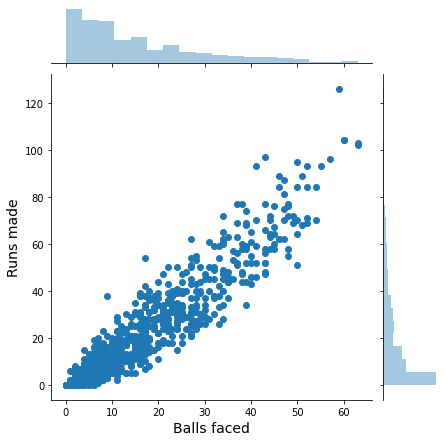

In [32]:
p4 = sns.jointplot(datapoints[:, 1], datapoints[:, 0])
p4.set_axis_labels('Balls faced', 'Runs made', fontsize=14)

### **Question 5**
* Create a new calculated column called **boundary_contribution**. It is calculated as : **(total runs made in 4s + 6s)/(total runs scored)**
* Create a scatter-plot between **boundary_contribution** and **strike_rate** where each dot represents an innings by a batsman
* Aggregate **boundary_contribution** by player and list down **top 10** players by boundary_contribution across all seasons
---------------------------------

In [33]:
import matplotlib.pyplot as plt

In [34]:
dfbat['boundary_contribution'] = (dfbat['fours']*4 + dfbat['sixes']*6)/dfbat['R']

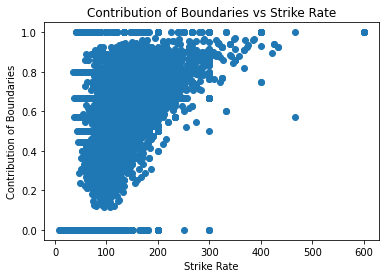

In [35]:
plt.scatter(dfbat['SR'], dfbat['boundary_contribution'])
plt.xlabel('Strike Rate')
plt.ylabel('Contribution of Boundaries')
plt.title('Contribution of Boundaries vs Strike Rate')
plt.show()

In [36]:
top_10_bat_contrib = dfbat.groupby(['batsmen'])['boundary_contribution'].sum().sort_values(ascending=False)[:10]
pd.DataFrame(top_10_bat_contrib)

,boundary_contribution
batsmen,
SK Raina,91.020318
RV Uthappa,87.539258
CH Gayle,84.350876
V Kohli,83.108704
S Dhawan,82.840033
RG Sharma,82.769190
SR Watson,73.769430
MS Dhoni,73.397890
YK Pathan,70.158935


### **Question 6**
* List down **top 10** batsmen by **strike_rate** across all seasons. Plot the top 10 batsmen on a **bar chart**
* Repeat the above task for **bottom 10** batsmen
* Create a sub-plot with three sections. Show the below visuals in each : 
  * Box plot of **strike rates** of the top 10 batsmen listed in 1st part of the question
  * Box plot of **runs scored** of the top 10 batsmen
  * Box plot of **boundary_contribution** of the top 10 batsmen
----------------------------------

In [37]:
batsmen_df = dfbat.groupby(['batsmen'])['R', 'B'].sum().sort_values(by='R', ascending=False)
batsmen_df['strike_rate'] = 100 * batsmen_df['R']/batsmen_df['B']

top_10_bat_runs = batsmen_df.nlargest(10, 'strike_rate')['R']
top_10_bat_sr = batsmen_df.nlargest(10, 'strike_rate')['strike_rate']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'strike_rate')

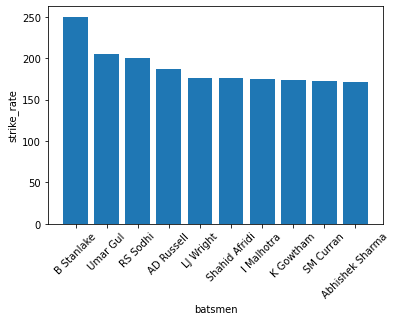

In [38]:
plt.bar(top_10_bat_sr.index, top_10_bat_sr.values)
plt.xlabel('batsmen')
plt.xticks(rotation=45)
plt.ylabel('strike_rate')

In [39]:
bottom_10_sr = batsmen_df.nsmallest(10, 'strike_rate')['strike_rate']

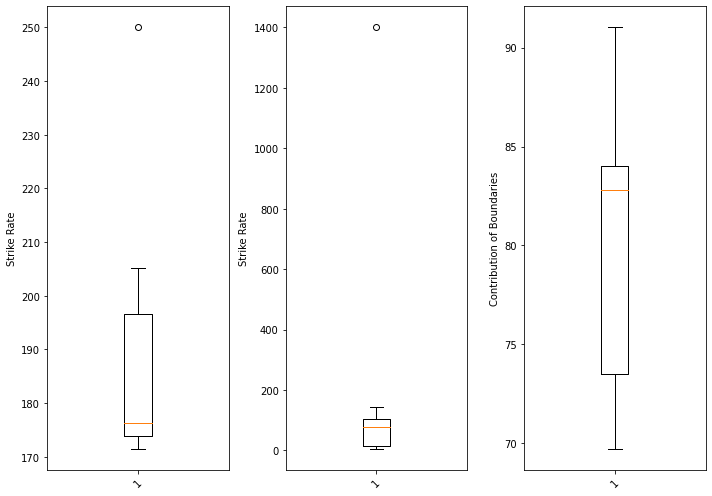

In [44]:
fig = plt.figure(figsize=(10, 7))

plt.subplot(1,3,1)
plt.boxplot(top_10_bat_sr.values)
plt.xticks(rotation=45)
plt.ylabel('Strike Rate')

plt.subplot(1,3,2)
plt.boxplot(top_10_bat_runs.values)
plt.xticks(rotation=45)
plt.ylabel('Strike Rate')

plt.subplot(1,3,3)
plt.boxplot(top_10_bat_contrib.values)
plt.xticks(rotation=45)
plt.ylabel('Contribution of Boundaries')
plt.tight_layout()

### **Question 7**
* Create a new column called **dismissal_status**. Use the wicket_status column to extract values like **caught, lbw, bowled** etc. and store in dismissal_status column
* Extract the bowler name from the column **wicket_status** and store in a new column called **bowler_name**
* Extract fielder name from the **wicket_status** column and store in a new column called **fielder_name**
* Create a new column called **fielder_involved**. Set it to 1 if a fielder was involved in the dismissal else 0
* Create a **count plot** of player dismissals across the categories calculated above. Which category stands out from the rest?
------------------


In [45]:
import seaborn as sns

In [46]:
dfbat['wicket_status'].str.split(' ', 1).str.get(0).unique()

dismissal_status_map = {'c':'caught', 'not':'not out', 'run':'run out', 'b':'bowled', 'st':'stumped', 'lbw':'lbw', 'absent':'absent hurt', 'hit':'hit wicket', 'retired':'retired out', 'obstructing':'obstructing the field'}

In [47]:
dfbat['dismissal_status'] = dfbat.apply(lambda x : dismissal_status_map[x['wicket_status'].split(" ", 1)[0]], axis=1)
dfbat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution,dismissal_status
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,0.769231,caught
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,0.474576,not out
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,0.363636,caught
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,0.444444,caught
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,0.800000,caught


In [48]:
dfbat['bowler_name'] = dfbat['wicket_status'].str.split("b ", 1).str.get(1)

print('Null values: {}'.format(dfbat['bowler_name'].isna().sum()))

Null values: 3563


In [49]:
dfbat['fielder_involved'] = 0
dfbat.loc[dfbat['dismissal_status'] == 'caught', 'fielder_involved'] = 1

In [51]:
dfbat.head()

,match_no,team_1,team_2,batsmen,wicket_status,R,B,M,fours,sixes,SR,special_role,match_date,match_key,boundary_contribution,dismissal_status,bowler_name,fielder_involved
0,1,Mumbai Indians,Chennai Super Kings,ST Jayasuriya,c Hayden b Thushara,26,20,0,5,0,130.00,normal player,18-04-2009,2009041801,0.769231,caught,Thushara,1
1,1,Mumbai Indians,Chennai Super Kings,SR Tendulkar,not out,59,49,0,7,0,120.40,captain,18-04-2009,2009041801,0.474576,not out,NaN,0
2,1,Mumbai Indians,Chennai Super Kings,S Dhawan,c Dhoni b Gony,22,21,0,2,0,104.76,normal player,18-04-2009,2009041801,0.363636,caught,Gony,1
3,1,Mumbai Indians,Chennai Super Kings,JP Duminy,c & b Gony,9,7,0,1,0,128.57,normal player,18-04-2009,2009041801,0.444444,caught,Gony,1
4,1,Mumbai Indians,Chennai Super Kings,DJ Bravo,c Hayden b Joginder Sharma,5,4,0,1,0,125.00,normal player,18-04-2009,2009041801,0.800000,caught,Joginder Sharma,1


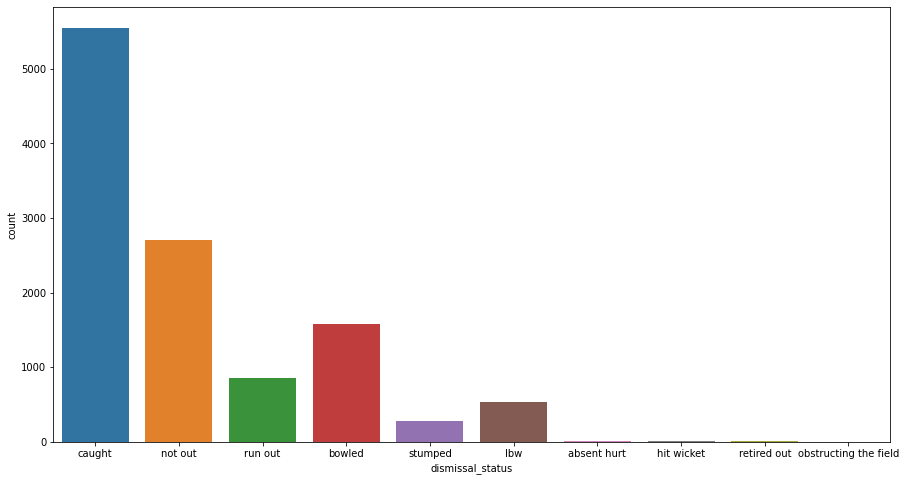

In [58]:
ax=sns.countplot(x="dismissal_status", data=dfbat)
ax.figure.set_size_inches(15,8)

### **Question 8**
* Create a dataframe at a player level. Calculate below mentioned metrics :
  * #50s
  * #100s
  * #4s
  * #6s
  * Average
* Assign below points to the players based on the above metrics and calculate the total points earned : 
  * 1 half century = **5 points**
  * 1 century = **10 points**
  * 1 four = **2 point**
  * 1 six = **4 points**
  * Average > 30 = **20 points**
  * Average < 30 = **10 points**

* Rank the players based on total points earned. Now list down the top 10 batsmen overall across all IPL seasons
------------------


In [59]:
dfplayer=dfbat.groupby('batsmen').mean()
dfplayer['50s']=0
dfplayer['100s']=0
for i in range(len(dfplayer.index)):
  fours=0
  sixes=0
  halfcen=0
  cen=0
  for j in range(len(dfbat)):
    if dfbat['batsmen'][j]==dfplayer.index[i]:
      fours=fours+dfbat['fours'][j]
      sixes=sixes+dfbat['sixes'][j]
      if dfbat['R'][j]>50 and dfbat['R'][j]<100:
        halfcen=halfcen+1
      elif dfbat['R'][j]>100:
        cen=cen+1
  dfplayer['fours'][i]=fours
  dfplayer['sixes'][i]=sixes
  dfplayer['50s'][i]=halfcen
  dfplayer['100s'][i]=cen


dfplayer['avg']=dfplayer['R']
dfplayer.drop('R',axis=1,inplace=True)
dfplayer.drop('B',axis=1,inplace=True)
dfplayer.drop('M',axis=1,inplace=True)
dfplayer.drop('SR',axis=1,inplace=True)
dfplayer.drop('match_key',axis=1,inplace=True)
dfplayer.drop('boundary_contribution',axis=1,inplace=True)
dfplayer.drop('fielder_involved',axis=1,inplace=True)


dfplayer['points']=0
for i in range(len(dfplayer)):
  dfplayer['points'][i]=dfplayer['fours'][i]*2+ dfplayer['sixes'][i]*4+ dfplayer['50s'][i]*5 + dfplayer['100s'][i]*10
  if dfplayer['avg'][i]>30:
    dfplayer['points'][i]=dfplayer['points'][i]+20
  else:
    dfplayer['points'][i]=dfplayer['points'][i]+10


dfplayer.sort_values(by='points',ascending=False,inplace=True)


dfplayer['Rank']=0
for i in range(len(dfplayer)):
  dfplayer['Rank'][i]=i+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to b

In [61]:
dfplayer.head(10)

,fours,sixes,50s,100s,avg,points,Rank
batsmen,,,,,,,
CH Gayle,368.0,326.0,27,6,36.161290,2255,1
SK Raina,493.0,194.0,37,0,28.402116,1957,2
V Kohli,480.0,190.0,35,3,32.023669,1945,3
DA Warner,458.0,181.0,43,3,37.349206,1905,4
RG Sharma,431.0,194.0,31,1,26.765027,1813,5
AB de Villiers,357.0,212.0,30,3,30.950704,1762,6
RV Uthappa,435.0,156.0,23,0,25.947059,1619,7
S Dhawan,524.0,96.0,30,0,28.981013,1592,8
MS Dhoni,297.0,209.0,23,0,26.070588,1555,9


Therefore, these are the top 10 batsmen across all IPL Seasons with Chris Gayle topping the charts!

### **Question 9**
* Look for a column called **Special_role** to denote if a player is captain or not. 
* **Filter** the dataframe based on if a player is a captain.
* Pick all the innings by the captains (For **IPL 2017**) and plot a **box and whiskers plot** of **%run_contribution** per captain
  * Which captain do you think has played **captain's knock** most of the times? (purely going by % contribution to scorecard for now)
------------------


In [62]:
dfdel = pd.read_csv('drive/My Drive/data/ipl_deliveries.csv')
bat_2017 = dfbat[(dfbat['special_role'] == 'captain') & (dfbat['match_date'].str[-4:] == '2017')]
matches_2017 = bat_2017['match_key'].unique()

In [63]:
del_2017_matches = dfdel[dfdel['Match_id'].isin(matches_2017)]
del_2017_matches.head()

,Match_id,City,Innings,Winner,Team,Over,Delivery,Batsman,Bowler,non_striker,runs_batsman,runs_extras,extras_type,Runs_total,player_out,mode_of_dismissal,fielders_involved,file_name
10325,2017040801,Bangalore,1,Royal Challengers Bangalore,Royal Challengers Bangalore,1,0.1,CH Gayle,Z Khan,SR Watson,1,0,NaN,1,NaN,NaN,NaN,1082595.yaml
10326,2017040801,Bangalore,1,Royal Challengers Bangalore,Royal Challengers Bangalore,1,0.2,SR Watson,Z Khan,CH Gayle,4,0,NaN,4,NaN,NaN,NaN,1082595.yaml
10327,2017040801,Bangalore,1,Royal Challengers Bangalore,Royal Challengers Bangalore,1,0.3,SR Watson,Z Khan,CH Gayle,0,0,NaN,0,NaN,NaN,NaN,1082595.yaml
10328,2017040801,Bangalore,1,Royal Challengers Bangalore,Royal Challengers Bangalore,1,0.4,SR Watson,Z Khan,CH Gayle,4,0,NaN,4,NaN,NaN,NaN,1082595.yaml
10329,2017040801,Bangalore,1,Royal Challengers Bangalore,Royal Challengers Bangalore,1,0.5,SR Watson,Z Khan,CH Gayle,0,0,NaN,0,NaN,NaN,NaN,1082595.yaml


In [64]:
bat_2017['batsmen'].drop_duplicates().shape

(11,)

In [65]:
batsman_team_df = del_2017_matches[del_2017_matches['Batsman'].isin(bat_2017['batsmen'].drop_duplicates())][['Batsman', 'Team']].drop_duplicates()

capt_to_team = dict(zip(batsman_team_df.Batsman, batsman_team_df.Team))
capt_to_team

{'AM Rahane': 'Rising Pune Supergiant',
 'DA Warner': 'Sunrisers Hyderabad',
 'G Gambhir': 'Kolkata Knight Riders',
 'GJ Maxwell': 'Kings XI Punjab',
 'KK Nair': 'Delhi Daredevils',
 'RG Sharma': 'Mumbai Indians',
 'SK Raina': 'Gujarat Lions',
 'SPD Smith': 'Rising Pune Supergiant',
 'SR Watson': 'Royal Challengers Bangalore',
 'V Kohli': 'Royal Challengers Bangalore',
 'Z Khan': 'Delhi Daredevils'}

In [66]:
teams_score_all = del_2017_matches.groupby(['Match_id', 'Team']).agg({'runs_batsman':'sum'})
teams_score_all.head()

runs_batsman
Match_id   Team                                     
2017040501 Royal Challengers Bangalore           166
           Sunrisers Hyderabad                   200
2017040601 Mumbai Indians                        176
           Rising Pune Supergiant                183
2017040701 Gujarat Lions                         179

## Analysis

By considering only the run contribution, **David Warner** has played the best amongst all other captains, by keeping the contribution median higher than others.
Warner is followed by Virat Kohli, and Gautam Gambhir.

### **Question 10**
* Is IPL more in favor of batsmen?
* Let's consider two metrics **total_runs** made in a match and the **run_rate** of the match
* Create a **histogram** of **total_runs** by match. What kind of a **distribution** your discover?
* **Repeat** the above step for **run_rate** per match too
* Is the distribution **left skewed** or **right skewed**?
* Discuss your insights

------------------

In [67]:
balls = dfdel.groupby(dfdel['Match_id']).agg('count')
balls = balls.reset_index()

In [68]:
runs = dfdel.groupby(dfdel['Match_id']).sum()
runs= runs.reset_index()

In [69]:
hist = pd.DataFrame(balls.Match_id)
hist['Runs'] = runs['Runs_total']
hist['Over'] = balls['Over']/6
hist['Run_rate'] = hist['Runs']/hist['Over']

In [71]:
hist.head()

,Match_id,Runs,Over,Run_rate
0,2008041801,304,37.500000,8.106667
1,2008041901,447,41.333333,10.814516
2,2008041902,261,36.500000,7.150685
3,2008042001,222,40.000000,5.550000
4,2008042002,331,41.000000,8.073171


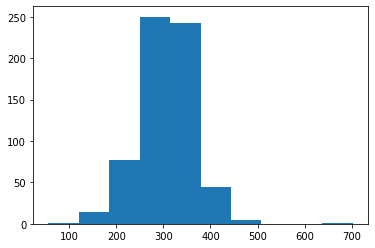

In [72]:
plt.hist(hist['Runs'])
plt.show()

In [73]:
from scipy.stats import skew
print (skew(hist['Runs']))

0.16549864555640462


The skewness of the histogram is positive which means that it is a right skewed distribution.

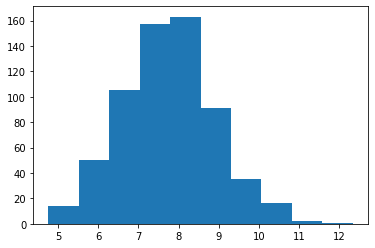

In [74]:
plt.hist(hist['Run_rate'])
plt.show()

In [75]:
print (skew(hist['Run_rate']))

0.23495544079264055


The skewness of the Run_rate histogram is also positive therefore means that this is also a right-skewed distribution.

### **Question 11**
* **Filter** the histogram (created in **Question 10**) for an **IPL season**. Ex. IPL 2016
* Also, filter the histogram for a **team** within a **season**. Ex. for CSK within IPL 2016
* **Describe** your observations. Think along the following **questions** : 
  * What is the meaning of **skewness**?
  * Is there an **observable difference** between the **rate of runs** scored for some teams over others?
    * Choose appropriate **visualization** to understand **run_rate** of teams (**Hint :** Violin charts)
    * Which teams are strong at making **large quantity** of runs?
    * Which teams are strong at making runs at a **quicker rate**? (Consider run a ball the **base line** for **under** or **over** indexing teams)

* **Note :** *A metric is said to be under-indexed when it's value is less than the baseline value. Similarly it is said to be over-indexed when it's value is more than the baseline value*

-------------------------
    

In [91]:
hist2016 = hist[hist['Match_id'].astype(str).str.contains('2016')]

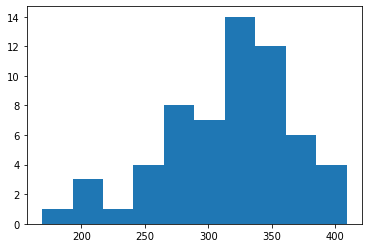

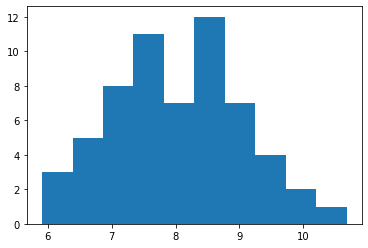

In [94]:
plt.hist(hist2016['Runs'])
plt.show()
plt.hist(hist2016['Run_rate'])
plt.show()

In [95]:
ipl_matches_2016 = dfmat[dfmat['Team 1']=='Mumbai Indians']
dts = ipl_matches_2016.match_date.to_numpy()
match_2016 = list()

for i in dts:
  if '2016' in i:
    temp = i.split('-')
    match_2016.append(temp[0]+temp[1]+temp[2]+'01')

ipl_matches_2016 = dfmat[dfmat['Team 2']=='Mumbai Indians']
dts = ipl_matches_2016.match_date.to_numpy()

for i in dts:
  if '2016' in i:
    temp = i.split('-')
    match_2016.append(temp[0]+temp[1]+temp[2]+'02')

runs_2016 = list()
run_rate = list()
for j in match_2016:
  if j in hist2016.Match_id.astype(str).to_numpy():
    r = hist2016[hist2016['Match_id'].astype(str)==j]['Runs'].to_numpy()[0]
    rr = hist2016[hist2016['Match_id'].astype(str)==j]['Run_rate'].to_numpy()[0]
    runs_2016.append(r)
    run_rate.append(rr)

In [97]:
ipl_matches_16 = dfmat[dfmat['year']==2016]
teams = ipl_matches_16['Team 1'].unique()

In [99]:
for team in teams:
  ipl_matches_2016 = dfmat[dfmat['Team 1']==team]
  dts = ipl_matches_2016.match_date.to_numpy()
  match_2016 = list()
  for i in dts:
    if '2016' in i:
      temp = i.split('-')
      match_2016.append(temp[0]+temp[1]+temp[2]+'01')
  
  ipl_matches_2016 = dfmat[dfmat['Team 2']==team]
  dts = ipl_matches_2016.match_date.to_numpy()
  for i in dts:
    if '2016' in i:
      temp = i.split('-')
      match_2016.append(temp[0]+temp[1]+temp[2]+'02')
  
  runs_2016 = list()
  run_rate = list()
  
  for j in match_2016:
    if j in hist2016.Match_id.astype(str).to_numpy():
      r = hist2016[hist2016['Match_id'].astype(str)==j]['Runs'].to_numpy()[0]
      rr = hist2016[hist2016['Match_id'].astype(str)==j]['Run_rate'].to_numpy()[0]
      runs_2016.append(r)
      run_rate.append(rr)
  

### **Question 12**
* Calculate a metric **%fast_innings**. This would be percentage of innings where run_rate is more than base_line run rate of **6.0 per over**
    * Which team are top 3 teams by **%fast_innings**?
    * What insights do you have about the teams against %fast_innings?
* Let's now think of how **fast** or **slow** the run was made.
  * We will create a metric which would be an indicator of speed. Let's create a metric called **dist_base_line** which means **innings_run_rate - 6.0**.
  * A **negative** value would mean slow run_rate and **positive** would mean fast. The value would mean the **intensity**. (We can say a value of 3.6-6 = -2.4 means a very slow run rate. Which a value of 10.2-6 = 3.6 as a very fast run rate)
  * For a team (chose any of your choice), visualize the distribution of negative values and do the same for positive ones. 
  * Do you find skewness? If yes, how strong is it. Discuss the interesting cases.
* Are there instances where teams are making lots of runs at a very fast pace?
  * Create a **scatter-plot** with **runs_made** on x-axis and **run_rate** on y-axis. 
  * The **color** of the dots should correspond to the team color
  * Discuss the **insights** derived. Are there teams really dominating the run making?

---------------------------

In [100]:
hist.dtypes

Match_id      int64
Runs          int64
Over        float64
Run_rate    float64
dtype: object

In [101]:
teams=list()
match = hist.Match_id.astype(str).to_numpy()
sum = 0
for j in match:
  date = j[0:4]+'-'+j[4:6]+'-'+j[6:8]
  temp = dfmat[dfmat['match_date']==date]
  if temp.empty == False:
    if j[9:] == '1':
      teams.append(temp.iloc[0]['Team 1'])
    elif j[9:] =='2':
      teams.append(temp.iloc[0]['Team 2'])
    if j[9:] == '3':
      teams.append(temp.iloc[0]['Team 1'])
    elif j[9:] =='4':
      teams.append(temp.iloc[0]['Team 2'])
  elif temp.empty == True:
    teams.append('NA')

In [102]:
hist['Team'] = teams
Q12 = hist[hist['Team']!='NA']
teams = Q12.groupby(Q12['Team']).agg('count')
teams = teams.reset_index()
Q12 = Q12[Q12['Run_rate']>6.0]
Q12_1 = Q12.groupby(Q12['Team']).agg('count')
Q12_1 = Q12_1.reset_index()
teams['RR_gt_6'] = Q12_1['Match_id']
teams['%fast'] = (teams['RR_gt_6']/teams['Match_id'])*100
teams.sort_values(by = '%fast',ascending=False)

,Team,Match_id,Runs,Over,Run_rate,RR_gt_6,%fast
5,Kochi Tuskers Kerala,6,6,6,6,6,100.000000
10,Rising Pune Supergiant,12,12,12,12,12,100.000000
0,Chennai Super Kings,65,65,65,65,63,96.923077
11,Royal Challengers Bangalore,82,82,82,82,78,95.121951
9,Rajasthan Royals,59,59,59,59,56,94.915254
4,Kings XI Punjab,76,76,76,76,72,94.736842
1,Deccan Chargers,36,36,36,36,34,94.444444
3,Gujarat Lions,17,17,17,17,16,94.117647
6,Kolkata Knight Riders,69,69,69,69,64,92.753623
2,Delhi Capitals,77,77,77,77,71,92.207792


In [103]:
teams.head()

,Team,Match_id,Runs,Over,Run_rate,RR_gt_6,%fast
0,Chennai Super Kings,65,65,65,65,63,96.923077
1,Deccan Chargers,36,36,36,36,34,94.444444
2,Delhi Capitals,77,77,77,77,71,92.207792
3,Gujarat Lions,17,17,17,17,16,94.117647
4,Kings XI Punjab,76,76,76,76,72,94.736842


In [104]:
hist['dist_base_line'] = hist['Run_rate'] - 6.0
hist_MI = hist[hist['Team']=='Mumbai Indians']
hist_MI_P = hist_MI[hist_MI['dist_base_line']>0]
hist_MI_N = hist_MI[hist_MI['dist_base_line']<0]

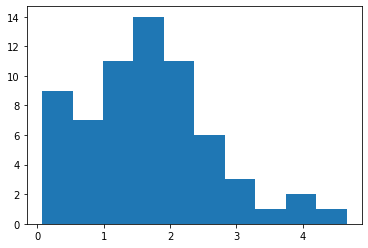

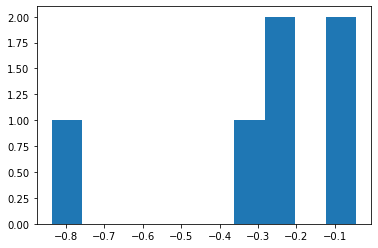

In [105]:
plt.hist(hist_MI_P['dist_base_line'])
plt.show()
plt.hist(hist_MI_N['dist_base_line'])
plt.show()

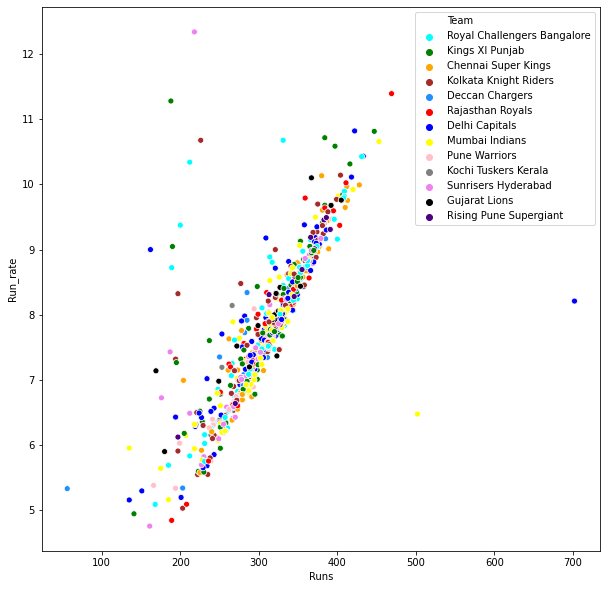

In [109]:
scatterplt = hist[hist['Team']!='NA']
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x="Runs", y="Run_rate", hue="Team", data=scatterplt,palette=['aqua','green','orange','brown','dodgerblue','red','blue','yellow','pink','gray','violet','black','indigo'], legend='full')

### **Question 13**
* Let's analyze whether higher run_rate lead to victory?
* Create a visualization to analyze run_rates of teams in matches which it won against the ones it lost. (Hint : Box plots)
* Discuss your insights :
  * Is there a team which is really winning based on a higher run_rate maintained by them?
  * Think about a **statistical test of significance** which can help you evaluate the hypothesis mentioned in the 1st point.
    * **Reference 1 :** [Understanding the tests of significance](https://towardsdatascience.com/statistical-significance-hypothesis-testing-the-normal-curve-and-p-values-93274fa32687)
    * **Reference 2 :** [When to apply what?](https://towardsdatascience.com/statistical-tests-when-to-use-which-704557554740)
    * **Reference 3 :** [Understanding T-test](https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29)
  * **(Optional)**. Implement the test and explain your result

------------------

In [110]:
from collections import defaultdict
import matplotlib.pyplot as plt
dfdel = pd.read_csv('drive/My Drive/data/ipl_deliveries.csv')

In [111]:
ball_count = dfdel.groupby(['Match_id','Winner', 'Team'])
bc1 = ball_count['Delivery'].count()
bc1

Match_id    Winner                 Team                       
2008041801  Kolkata Knight Riders  Kolkata Knight Riders          124
                                   Royal Challengers Bangalore    101
2008041901  Chennai Super Kings    Chennai Super Kings            124
                                   Kings XI Punjab                124
2008041902  Delhi Daredevils       Delhi Daredevils                97
                                                                 ... 
2017051701  Kolkata Knight Riders  Sunrisers Hyderabad            122
2017051901  Mumbai Indians         Kolkata Knight Riders          116
                                   Mumbai Indians                  91
2017052101  Mumbai Indians         Mumbai Indians                 125
                                   Rising Pune Supergiant         123
Name: Delivery, Length: 1266, dtype: int64

In [112]:
ball_count = dfdel.groupby(['Match_id','Winner', 'Team'])
rc1 = ball_count['Runs_total'].mean()
rc1

Match_id    Winner                 Team                       
2008041801  Kolkata Knight Riders  Kolkata Knight Riders          1.790323
                                   Royal Challengers Bangalore    0.811881
2008041901  Chennai Super Kings    Chennai Super Kings            1.935484
                                   Kings XI Punjab                1.669355
2008041902  Delhi Daredevils       Delhi Daredevils               1.360825
                                                                    ...   
2017051701  Kolkata Knight Riders  Sunrisers Hyderabad            1.049180
2017051901  Mumbai Indians         Kolkata Knight Riders          0.922414
                                   Mumbai Indians                 1.219780
2017052101  Mumbai Indians         Mumbai Indians                 1.032000
                                   Rising Pune Supergiant         1.040650
Name: Runs_total, Length: 1266, dtype: float64

In [113]:
dic_wonwith = defaultdict(list)
dic_lostwith = defaultdict(list)

dic_wonagainst = defaultdict(list)
dic_lostagainst = defaultdict(list)

In [114]:
for val in rc1.iteritems():
  if val[0][1] != val[0][2]:
    dic_wonagainst[val[0][1]].append(val[1]*6)
    dic_lostwith[val[0][2]].append(val[1]*6)
  else:
    dic_wonwith[val[0][2]].append(val[1]*6) 

  for x in rc1.iteritems():
    if x[0][1] == x[0][2] and x[0][0] == val[0][0]:
      dic_lostagainst[val[0][2]].append(x[1]*6)
      break

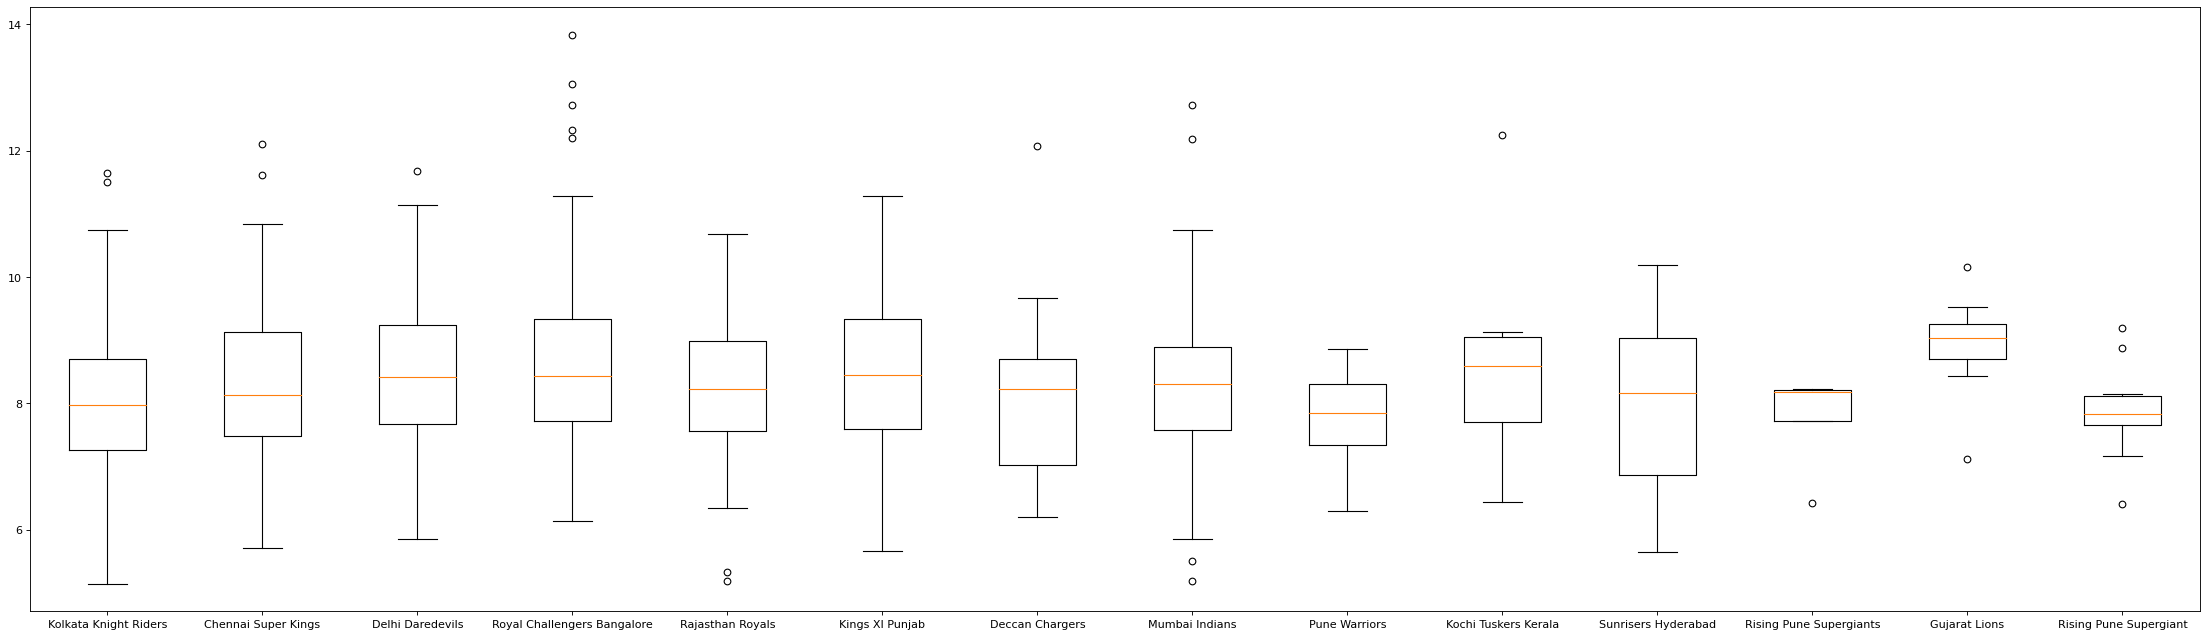

In [117]:
labels, data = [*zip(*dic_wonwith.items())]  # 'transpose' items to parallel key, value lists

plt.figure(num=None, figsize=(35, 10), dpi=80, facecolor='w', edgecolor='k')
# or backwards compatable

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

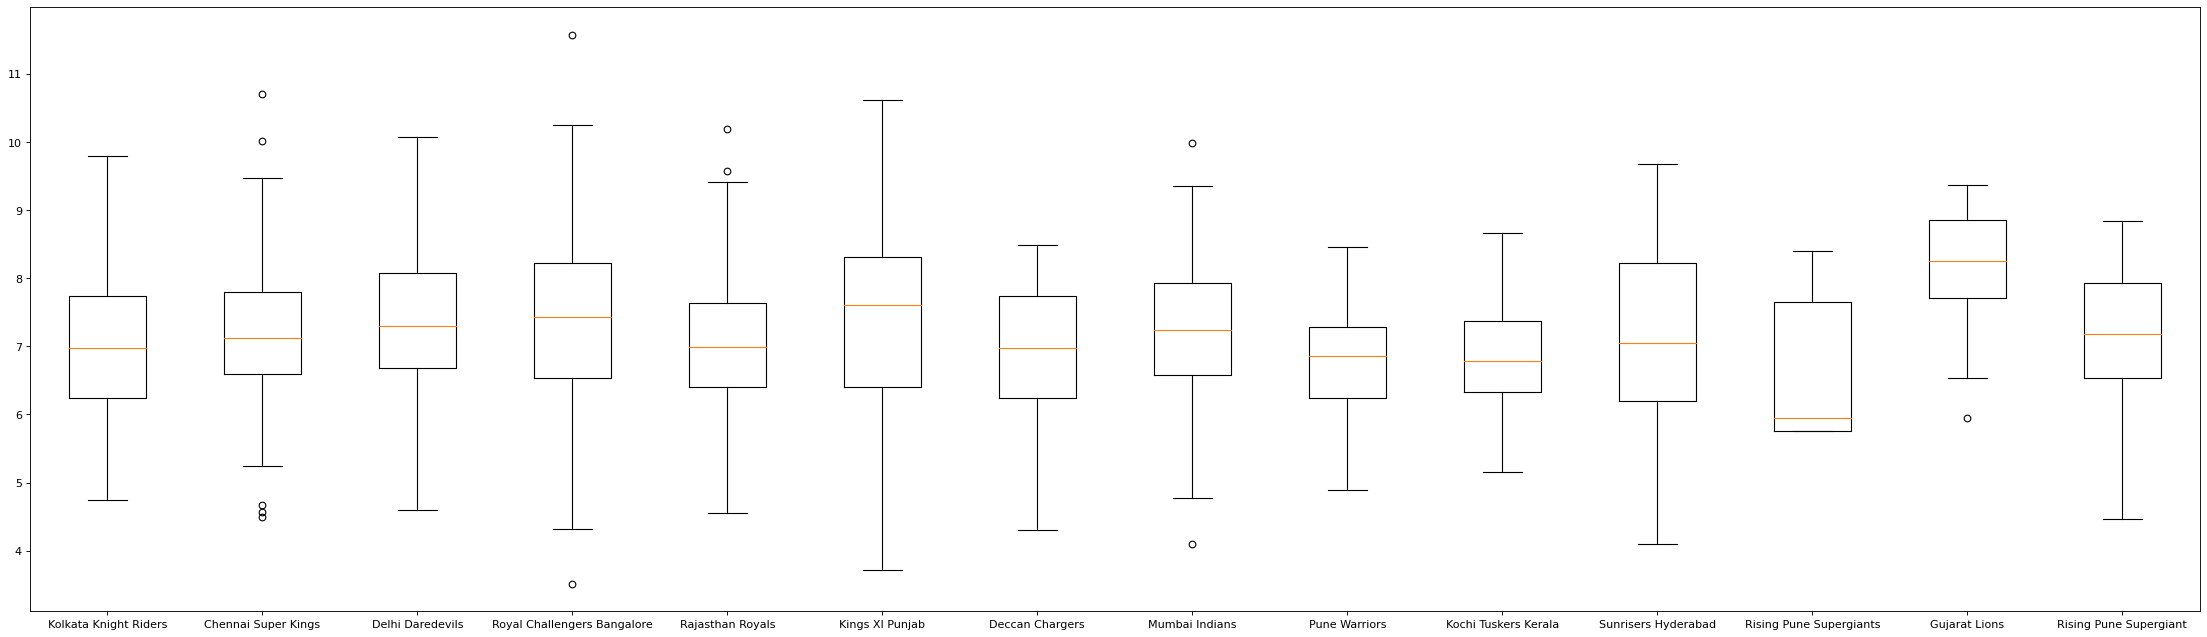

In [118]:
labels, data = [*zip(*dic_wonagainst.items())]  # 'transpose' items to parallel key, value lists

plt.figure(num=None, figsize=(35, 10), dpi=80, facecolor='w', edgecolor='k')
# or backwards compatable

plt.boxplot(data)
# pyplot.set_size(18.5, 10.5)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

### **Question 14**
* **Virat Kohli** is known to be a **master chaser**. Is it so? Let's validate through raw data
* Visualize the runs made by Virat Kohli in matches where his team played the **1st innings** (Hint : Use histograms)
* Visualize the runs made by Virat Kohli in matches where his team played the **2nd innings**. (Note : the 2 histograms should be plotted in the same figure)
* Interpret the histograms. Do they look cleanly **separated**?
* Create a **1X2** subplot : 
  * In subplot **(1,1)** plot the two histograms for the matches which his team won
  * In subplot **(1,2)** plot the two histograms for the matches which his team lost
  * **Discuss** your findings
    * Has Kohli been a great chaser **only** in matches won?
* Calculate Kohli's **run contribution(%)** for all matches played by him
  * Draw a violin plot of his **run_contribution(%)** for two categories : 
    * Matches **won** by his team
    * Matches **lost** by his team
  * Draw a **scatter plot** showing **run_contribution(%)** on **X-axis** and **strike_rate** on **y-axis**. Define **color** of dots as : 
    * **Green :** For matches won
    * **Red :** For matches lost
  * Discuss your insights. Do you think he has been playing captain's innings?


In [119]:
import seaborn as sns
dfdel = pd.read_csv('drive/My Drive/data/ipl_deliveries.csv')
kohli_df = dfdel[dfdel['Batsman'] == 'V Kohli']

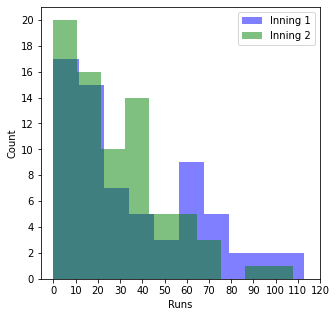

In [120]:
kohli_i1_df = kohli_df[kohli_df['Innings'] == 1]
kohli_i2_df = kohli_df[kohli_df['Innings'] == 2]

runs_i1 = kohli_i1_df.groupby('Match_id')['runs_batsman'].sum()
runs_i2 = kohli_i2_df.groupby('Match_id')['runs_batsman'].sum()

plt.figure(figsize=(5,5))
plt.hist(runs_i1, bins=10, alpha=0.5, label = 'Inning 1', color = 'b')
plt.hist(runs_i2, bins=10, alpha=0.5, label = 'Inning 2', color = 'g')
plt.xticks(range(0,130,10))
plt.yticks(range(0,21,2))
plt.xlabel('Runs')
plt.ylabel('Count')
plt.legend(loc='upper right')

### **Question 15 (Bonus Question)**
* Consider you are part of **team selection committee** for your team
* You are required to suggest **best nominations** for selection of **batsmen** during the team auctions
* Your team owner wants a **good mix** of batsmen who can exhibit the below **traits** :
  * Aggression
  * Consistency
  * Can hit at will
  * Pinch hitters
  * Sheet Anchors
  * Match finishers
* Use the data provided to you to create an exhaustive **list of metrics** which can demonstrate **quality** of a given batsman
* Apply **suitable machine learning** techniques to generate **clusters** of batsmen
* **Analyze** the clusters for **batting traits** and name them suitably
* **Discuss** your outcomes 

In [ ]:
# write your code here. Feel free to add multiple cells as per your need
